### a) Collect all the SIFT descriptors from the image datasets provided (Dataset_P1) and cluster them using k-Means into k number of clusters where k is a number you set (try various different values of k in order to improve the precision). The center of these clusters are the "visual words" i.e. representative features of your image datasets. The output of this clustering process is then called a visual codebook or sometimes referred to as dictionary. Draw the histogram of your k final visual codebook and save it in pickle format. You may need to normalize your histogram.

In [1]:
#Import Libary yang dibutuhkan untuk Baca Image
import numpy as np
import cv2
import os
from scipy import ndimage
from scipy.spatial import distance
from sklearn.cluster import KMeans

# Taruh Path dari semua image ke dalam Array
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        category = []
        path = folder + "/" + filename
        img = cv2.imread(path)
        if img is not None:
            images.append(img)
    return images

### Load images from dataset

In [2]:
# Baca Semua Image di Folder dengan library "os"
filenames = os.listdir('Dataset_P1/train')
images = load_images_from_folder('Dataset_P1/train')  # Ambil Semua Gambar Berdasarkan Kategori
test = load_images_from_folder("Dataset_P1/Query") # Ambil Image Testing

### Create Descriptors using CV2

In [6]:
# Menggunakan SIFT Descriptor
def create_descriptors(images):
    descriptors = []
    sift = cv2.xfeatures2d.SURF_create()
    for img in images:
        kp, des = sift.detectAndCompute(img, None)
        descriptors.extend(des)
    return descriptors

In [7]:
# Panggil Function SIFT Decriptor
descriptors = create_descriptors(images)

### Create clusters using K-Means

In [8]:
# Menggunakan K-Means untuk Clustering dengan 10 kali Iterasi
def kmeans(k, descriptor_list):
    kmeans = KMeans(n_clusters = k, n_init=10)
    kmeans.fit(descriptor_list)
    visual_words = kmeans.cluster_centers_ 
    return visual_words

# Panggil Fungsi K-Means dengan k = 150
visual_words = kmeans(150, descriptors) 

### b) Load an image from list of image queries and extract its SIFT descriptors. Based onSIFT descriptors, find the visual words of the corresponding query image and draw the histogram of it (histogram of visual words of the query image).

In [10]:
# Import Library untuk Penggambaran Histogram
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

### Plot using scatter and basic histogram to get insights on the clustering

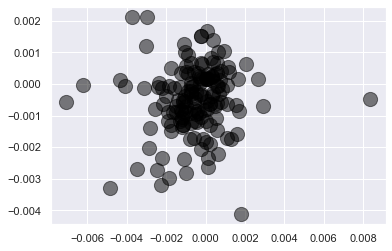

In [11]:
# Penggambaran Histogram dengan True dan False
plt.scatter(visual_words[:, 0], visual_words[:, 1], c='black', s=200, alpha=0.5);

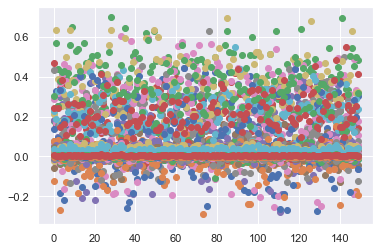

In [12]:
# Penggambaran Histogram untuk semua gambar
plt.plot(visual_words, 'o')
plt.show()

### As we can see from the above histograms, the visual words clustered using K-means has their own characteristic just by looking at their position in the plot